In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix

In [59]:
mu = 0
sigma = 1

In [60]:
array = np.random.normal(mu,sigma,1000)

In [61]:
array.shape

(1000,)

In [62]:
array.size

1000

In [63]:
autocorrelation = np.correlate(array, array, mode="full")

In [64]:
autocorrelation = list(autocorrelation[autocorrelation.size//2:])

(-10.0, 100.0)

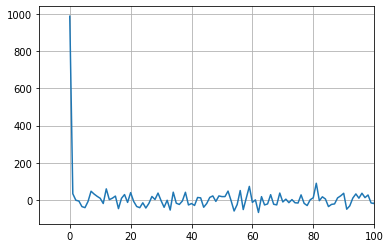

In [65]:
plt.plot(autocorrelation)
plt.grid("on")
plt.xlim([-10,+100])

In [66]:
max(autocorrelation)

987.689747321944

In [67]:
autocorrelation.index(max(autocorrelation))

0

In [68]:
df = pd.read_csv("NoisyDataset.csv",header=None)

In [69]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,306,307,308,309,310,311,312,313,314,315
995,0.808411,0.821816,0.835479,0.849052,0.862153,0.874391,0.885380,0.894772,0.902275,0.907674,...,0.742201,0.738913,0.735964,0.733326,0.730972,0.728876,0.727016,0.725368,0.723912,0.0
996,0.938134,0.969760,1.001871,1.033601,1.064005,1.092103,1.116935,1.137616,1.153396,1.163707,...,0.733507,0.731243,0.729212,0.727396,0.725775,0.724332,0.723051,0.721916,0.720914,0.0
997,1.028615,0.956448,1.242564,1.022027,1.366160,1.356022,1.327050,1.382152,1.262005,1.426543,...,1.002336,0.867829,0.999495,0.823586,0.634646,0.691459,0.778564,0.773287,0.628403,1.0
998,1.041927,1.088121,1.134976,1.181211,1.225427,1.266173,1.302025,1.331668,1.353984,1.368117,...,0.729829,0.727998,0.726356,0.724887,0.723576,0.722409,0.721373,0.720456,0.719645,0.0
999,0.781452,0.790998,0.800719,0.810363,0.819656,0.828313,0.836057,0.842635,0.847834,0.851496,...,0.739565,0.736587,0.733917,0.731528,0.729396,0.727499,0.725814,0.724321,0.723003,0.0


In [70]:
df.shape

(1000, 316)

In [71]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 315].values

In [72]:
y_true = list(y)

In [73]:
x.shape,y.shape

((1000, 315), (1000,))

In [74]:
x[:][1].shape

(315,)

In [89]:
np.unique(y_true)

array([0., 1.])

(array([494.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 506.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

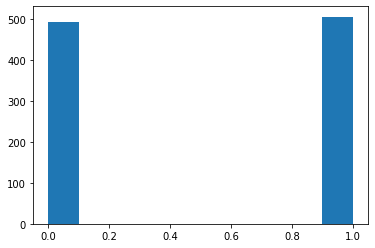

In [88]:
plt.hist(y_true)

In [76]:
def signaltonoise(a):
    axis=0
    ddof=0
    
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [77]:
snr = []

for i in range(x.shape[0]):
    
    array = x[:][i]
    
    snr.append(signaltonoise(array))

(array([302., 513., 118.,  43.,  13.,   6.,   2.,   1.,   1.,   1.]),
 array([ 2.89922396,  3.81477754,  4.73033112,  5.64588469,  6.56143827,
         7.47699185,  8.39254542,  9.308099  , 10.22365257, 11.13920615,
        12.05475973]),
 <a list of 10 Patch objects>)

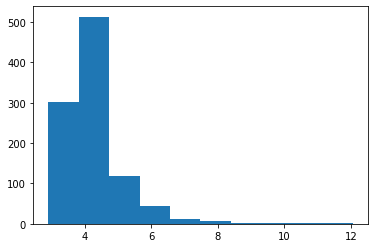

In [78]:
plt.hist(snr)

(3.81, 3.9)

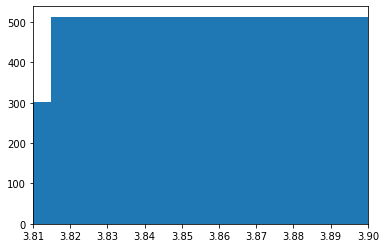

In [84]:
plt.hist(snr)
plt.xlim([3.81,3.9])

In [80]:
#snr

In [90]:
y_pred = []

for i in range(1000):
    if snr[i]>=3.81477754:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [91]:
print(confusion_matrix(y_true,y_pred))

[[417  77]
 [281 225]]


In [92]:
print(accuracy_score(y_true,y_pred))

0.642
